In [1]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

In [3]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [4]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.9666666666666668


In [5]:

# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0, 0.5, 'Cross-Validated Accuracy')

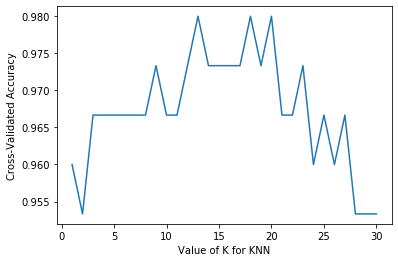

In [6]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [7]:
from sklearn.model_selection import GridSearchCV

In [29]:
# define the parameter values that should be searched
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [30]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [40]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)

In [41]:
# fit the grid with data
grid.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=13),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [43]:
# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.960000,0.053333,{'n_neighbors': 1}
1,0.953333,0.052068,{'n_neighbors': 2}
2,0.966667,0.044721,{'n_neighbors': 3}
3,0.966667,0.044721,{'n_neighbors': 4}
4,0.966667,0.044721,{'n_neighbors': 5}
5,0.966667,0.044721,{'n_neighbors': 6}
6,0.966667,0.044721,{'n_neighbors': 7}
7,0.966667,0.044721,{'n_neighbors': 8}
8,0.973333,0.032660,{'n_neighbors': 9}
9,0.966667,0.044721,{'n_neighbors': 10}


In [14]:
# print the array of mean scores only
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)

[0.96       0.95333333 0.96666667 0.96666667 0.96666667 0.96666667
 0.96666667 0.96666667 0.97333333 0.96666667 0.96666667 0.97333333
 0.98       0.97333333 0.97333333 0.97333333 0.97333333 0.98
 0.97333333 0.98       0.96666667 0.96666667 0.97333333 0.96
 0.96666667 0.96       0.96666667 0.95333333 0.95333333 0.95333333]


Text(0, 0.5, 'Cross-Validated Accuracy')

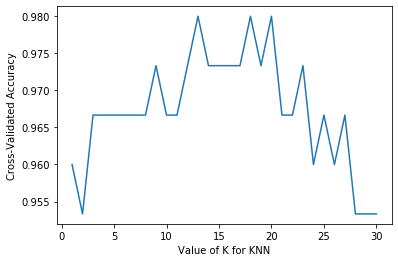

In [15]:

# plot the results
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [16]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9800000000000001
{'n_neighbors': 13}
KNeighborsClassifier(n_neighbors=13)


In [17]:
# define the parameter values that should be searched
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']

In [18]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [19]:

# instantiate and fit the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=30),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [20]:
# view the results
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.960000,0.053333,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,0.960000,0.053333,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.953333,0.052068,"{'n_neighbors': 2, 'weights': 'uniform'}"
3,0.960000,0.053333,"{'n_neighbors': 2, 'weights': 'distance'}"
4,0.966667,0.044721,"{'n_neighbors': 3, 'weights': 'uniform'}"
5,0.966667,0.044721,"{'n_neighbors': 3, 'weights': 'distance'}"
6,0.966667,0.044721,"{'n_neighbors': 4, 'weights': 'uniform'}"
7,0.966667,0.044721,"{'n_neighbors': 4, 'weights': 'distance'}"
8,0.966667,0.044721,"{'n_neighbors': 5, 'weights': 'uniform'}"
9,0.966667,0.044721,"{'n_neighbors': 5, 'weights': 'distance'}"


In [21]:

# examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.9800000000000001
{'n_neighbors': 13, 'weights': 'uniform'}


In [22]:

# train your model using all data and the best known parameters
knn = KNeighborsClassifier(n_neighbors=13, weights='uniform')
knn.fit(X, y)

# make a prediction on out-of-sample data
knn.predict([[3, 5, 4, 2]])

array([1])

In [23]:

# shortcut: GridSearchCV automatically refits the best model using all of the data
grid.predict([[3, 5, 4, 2]])

array([1])

In [24]:
from sklearn.model_selection import RandomizedSearchCV

In [25]:
# specify "parameter distributions" rather than a "parameter grid"
param_dist = dict(n_neighbors=k_range, weights=weight_options)

In [26]:
# n_iter controls the number of searches
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5, return_train_score=False)
rand.fit(X, y)
pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.973333,0.032660,"{'weights': 'distance', 'n_neighbors': 16}"
1,0.966667,0.033333,"{'weights': 'uniform', 'n_neighbors': 22}"
2,0.980000,0.030551,"{'weights': 'uniform', 'n_neighbors': 18}"
3,0.966667,0.044721,"{'weights': 'uniform', 'n_neighbors': 27}"
4,0.953333,0.042687,"{'weights': 'uniform', 'n_neighbors': 29}"
5,0.973333,0.032660,"{'weights': 'distance', 'n_neighbors': 10}"
6,0.966667,0.044721,"{'weights': 'distance', 'n_neighbors': 22}"
7,0.973333,0.044222,"{'weights': 'uniform', 'n_neighbors': 14}"
8,0.973333,0.044222,"{'weights': 'distance', 'n_neighbors': 12}"
9,0.973333,0.032660,"{'weights': 'uniform', 'n_neighbors': 15}"


In [27]:
# examine the best model
print(rand.best_score_)
print(rand.best_params_)

0.9800000000000001
{'weights': 'uniform', 'n_neighbors': 18}


In [28]:
# run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
best_scores = []
for _ in range(20):
    rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, return_train_score=False)
    rand.fit(X, y)
    best_scores.append(round(rand.best_score_, 3))
print(best_scores)

[0.973, 0.973, 0.98, 0.98, 0.98, 0.98, 0.98, 0.973, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.973, 0.98, 0.98, 0.98, 0.98, 0.98]


In [44]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
X, y = load_wine(return_X_y = True)

In [49]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [47]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

[Text(757.7052631578947, 697.62, 'X[12] <= 755.0\ngini = 0.658\nsamples = 178\nvalue = [59, 71, 48]'),
 Text(458.14736842105265, 570.78, 'X[11] <= 2.115\ngini = 0.492\nsamples = 111\nvalue = [2, 67, 42]'),
 Text(281.93684210526317, 443.94, 'X[10] <= 0.935\ngini = 0.227\nsamples = 46\nvalue = [0, 6, 40]'),
 Text(140.96842105263158, 317.1, 'X[6] <= 1.58\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(70.48421052631579, 190.26, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]'),
 Text(211.45263157894738, 190.26, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(422.90526315789475, 317.1, 'X[2] <= 2.45\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(352.42105263157896, 190.26, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(493.38947368421054, 190.26, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(634.3578947368421, 443.94, 'X[6] <= 0.795\ngini = 0.117\nsamples = 65\nvalue = [2, 61, 2]'),
 Text(563.8736842105263, 317.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]

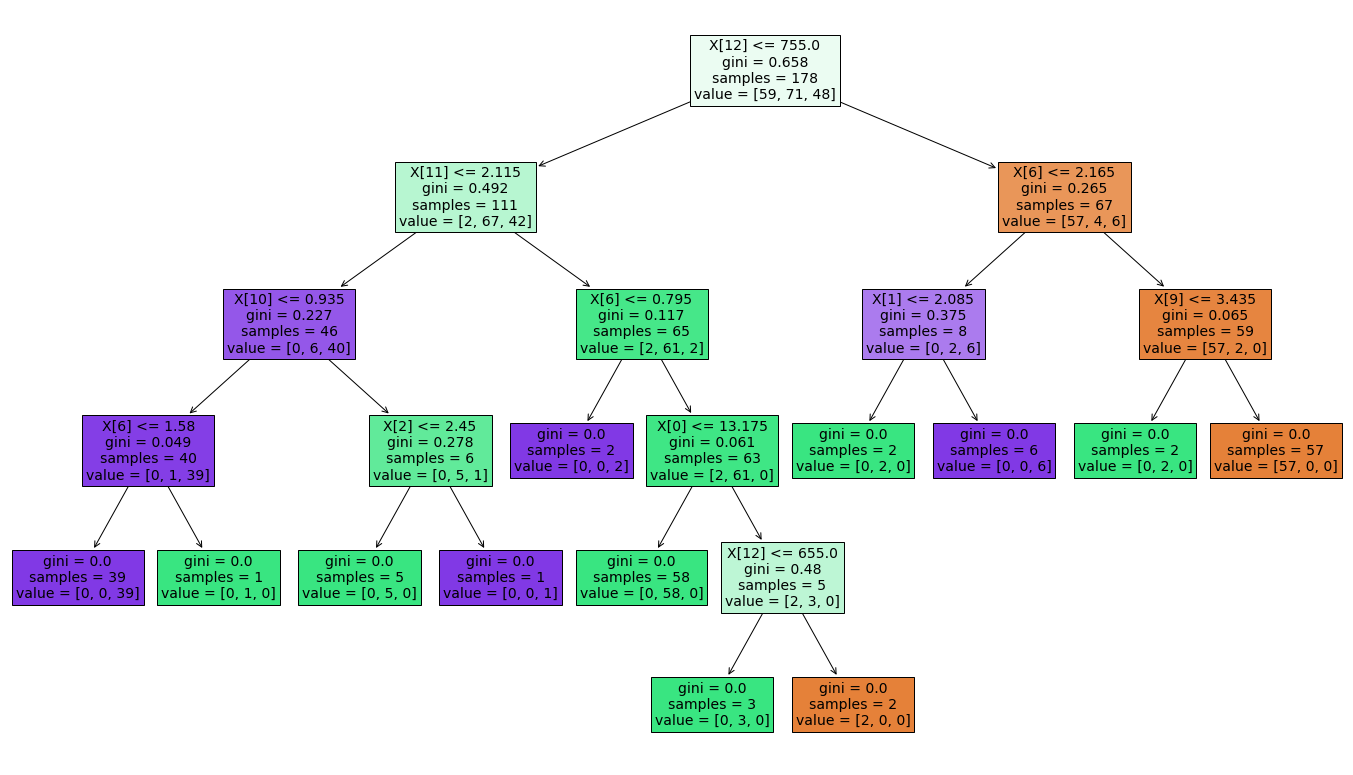

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(24,14))
tree.plot_tree(clf, filled=True, fontsize=14)

The model keeps splitting the nodes until all the nodes are pure (i.e. contain samples from only one class).
Let’s first understand what the information in a

#### We usually do not want a tree with all pure leaf nodes. It would be too specific and likely to overfit.

[Text(602.6400000000001, 453.0, 'X[12] <= 755.0\ngini = 0.658\nsamples = 178\nvalue = [59, 71, 48]'),
 Text(401.76000000000005, 271.8, 'X[11] <= 2.115\ngini = 0.492\nsamples = 111\nvalue = [2, 67, 42]'),
 Text(200.88000000000002, 90.59999999999997, 'gini = 0.227\nsamples = 46\nvalue = [0, 6, 40]'),
 Text(602.6400000000001, 90.59999999999997, 'gini = 0.117\nsamples = 65\nvalue = [2, 61, 2]'),
 Text(803.5200000000001, 271.8, 'gini = 0.265\nsamples = 67\nvalue = [57, 4, 6]')]

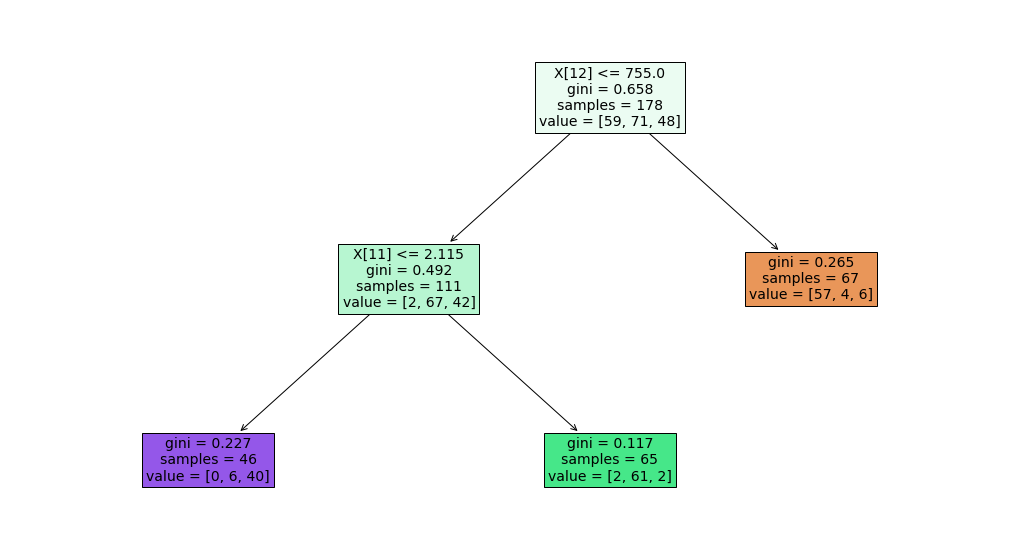

In [50]:
clf = tree.DecisionTreeClassifier(min_impurity_decrease=0.2)
clf.fit(X, y)
plt.figure(figsize=(18,10))
tree.plot_tree(clf, filled=True, fontsize=14)

[Text(602.6400000000001, 453.0, 'X[12] <= 755.0\ngini = 0.658\nsamples = 178\nvalue = [59, 71, 48]'),
 Text(401.76000000000005, 271.8, 'X[11] <= 2.115\ngini = 0.492\nsamples = 111\nvalue = [2, 67, 42]'),
 Text(200.88000000000002, 90.59999999999997, 'gini = 0.227\nsamples = 46\nvalue = [0, 6, 40]'),
 Text(602.6400000000001, 90.59999999999997, 'gini = 0.117\nsamples = 65\nvalue = [2, 61, 2]'),
 Text(803.5200000000001, 271.8, 'gini = 0.265\nsamples = 67\nvalue = [57, 4, 6]')]

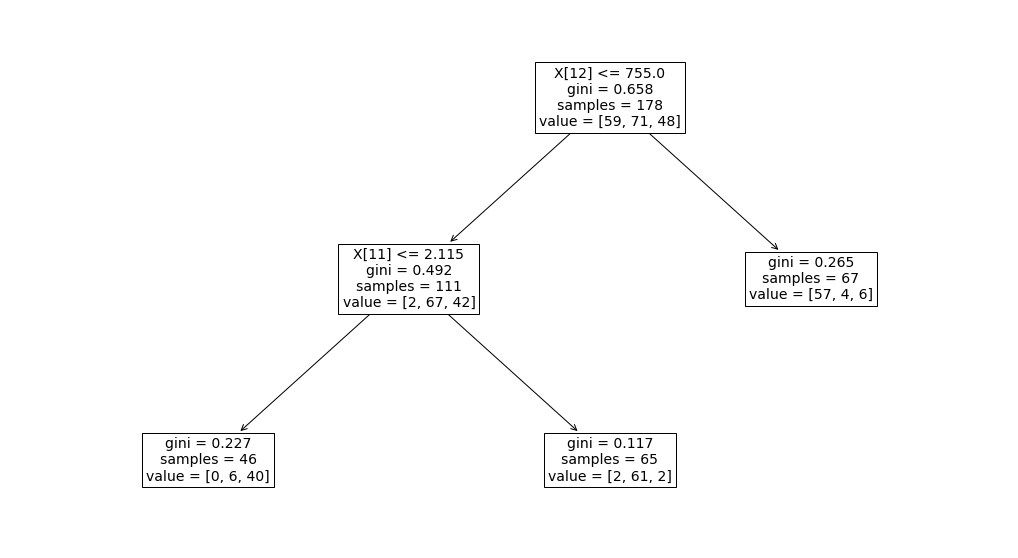

In [52]:
clf = tree.DecisionTreeClassifier(min_impurity_decrease=0.2)
clf.fit(X, y)
plt.figure(figsize=(18,10))
tree.plot_tree(clf, fontsize=14)

#### We now have a much smaller tree. Consider the green node at the bottom. 


#### It contains 65 samples and 61 of them belong to one class. There is no need to further split that node because we can afford to have 4 misclassified samples out of 65. If we keep splitting that node, the model will probably be overfitting. 


Another hyperparameter to control the depth of a tree is max_depth.

It does not make any calculations regarding impurity or sample ratio.

The model stops splitting when max_depth is reached.

[Text(558.0, 475.65000000000003, 'X[12] <= 755.0\ngini = 0.658\nsamples = 178\nvalue = [59, 71, 48]'),
 Text(279.0, 339.75, 'X[11] <= 2.115\ngini = 0.492\nsamples = 111\nvalue = [2, 67, 42]'),
 Text(139.5, 203.85000000000002, 'X[10] <= 0.935\ngini = 0.227\nsamples = 46\nvalue = [0, 6, 40]'),
 Text(69.75, 67.94999999999999, 'gini = 0.049\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(209.25, 67.94999999999999, 'gini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(418.5, 203.85000000000002, 'X[6] <= 0.795\ngini = 0.117\nsamples = 65\nvalue = [2, 61, 2]'),
 Text(348.75, 67.94999999999999, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(488.25, 67.94999999999999, 'gini = 0.061\nsamples = 63\nvalue = [2, 61, 0]'),
 Text(837.0, 339.75, 'X[6] <= 2.165\ngini = 0.265\nsamples = 67\nvalue = [57, 4, 6]'),
 Text(697.5, 203.85000000000002, 'X[9] <= 3.605\ngini = 0.375\nsamples = 8\nvalue = [0, 2, 6]'),
 Text(627.75, 67.94999999999999, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(767.25, 6

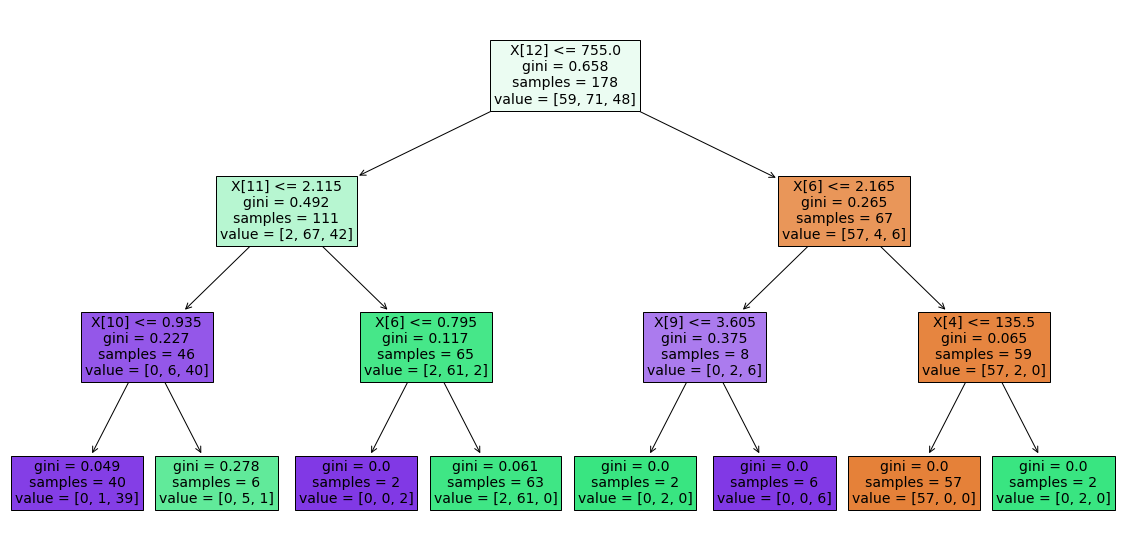

In [53]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, fontsize=14)

min_samples_leaf indicates the minimum number of samples required to be at a leaf node. 

This should be carefully used and may be a good indicator in controlling the senitivity of the tree

[Text(558.0, 475.65000000000003, 'X[12] <= 755.0\ngini = 0.658\nsamples = 178\nvalue = [59, 71, 48]'),
 Text(279.0, 339.75, 'X[11] <= 2.115\ngini = 0.492\nsamples = 111\nvalue = [2, 67, 42]'),
 Text(139.5, 203.85000000000002, 'X[10] <= 0.935\ngini = 0.227\nsamples = 46\nvalue = [0, 6, 40]'),
 Text(69.75, 67.94999999999999, 'gini = 0.049\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(209.25, 67.94999999999999, 'gini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(418.5, 203.85000000000002, 'X[8] <= 0.82\ngini = 0.117\nsamples = 65\nvalue = [2, 61, 2]'),
 Text(348.75, 67.94999999999999, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(488.25, 67.94999999999999, 'gini = 0.062\nsamples = 62\nvalue = [2, 60, 0]'),
 Text(837.0, 339.75, 'X[6] <= 2.165\ngini = 0.265\nsamples = 67\nvalue = [57, 4, 6]'),
 Text(697.5, 203.85000000000002, 'X[1] <= 2.575\ngini = 0.375\nsamples = 8\nvalue = [0, 2, 6]'),
 Text(627.75, 67.94999999999999, 'gini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(767.25

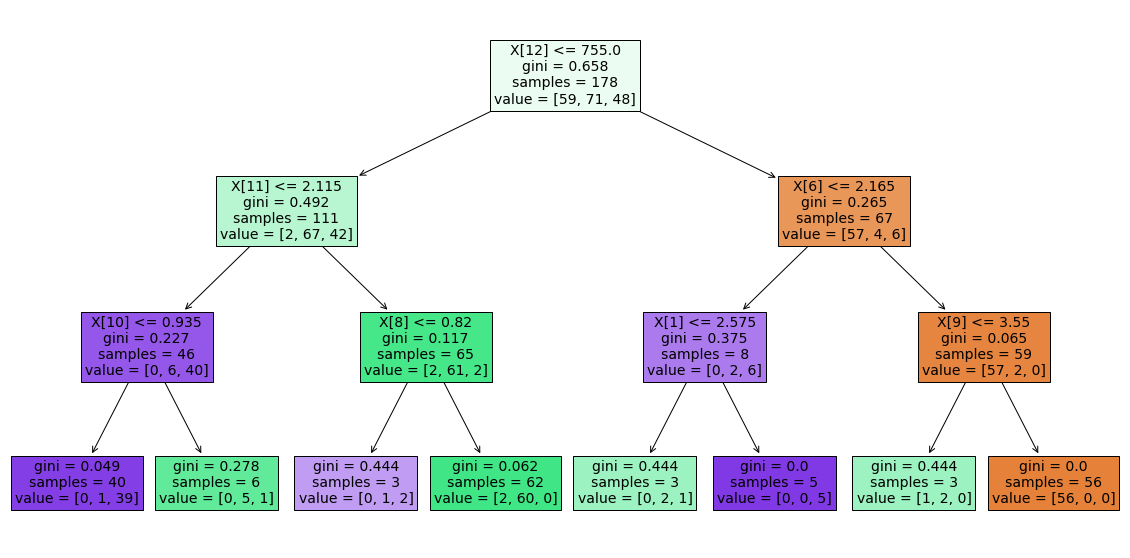

In [54]:
clf = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=3)
clf.fit(X, y)
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, fontsize=14)

[Text(604.5, 475.65000000000003, 'X[12] <= 755.0\ngini = 0.658\nsamples = 178\nvalue = [59, 71, 48]'),
 Text(372.0, 339.75, 'X[11] <= 2.115\ngini = 0.492\nsamples = 111\nvalue = [2, 67, 42]'),
 Text(186.0, 203.85000000000002, 'X[10] <= 0.83\ngini = 0.227\nsamples = 46\nvalue = [0, 6, 40]'),
 Text(93.0, 67.94999999999999, 'gini = 0.0\nsamples = 35\nvalue = [0, 0, 35]'),
 Text(279.0, 67.94999999999999, 'gini = 0.496\nsamples = 11\nvalue = [0, 6, 5]'),
 Text(558.0, 203.85000000000002, 'X[0] <= 12.805\ngini = 0.117\nsamples = 65\nvalue = [2, 61, 2]'),
 Text(465.0, 67.94999999999999, 'gini = 0.0\nsamples = 55\nvalue = [0, 55, 0]'),
 Text(651.0, 67.94999999999999, 'gini = 0.56\nsamples = 10\nvalue = [2, 6, 2]'),
 Text(837.0, 339.75, 'X[6] <= 2.3\ngini = 0.265\nsamples = 67\nvalue = [57, 4, 6]'),
 Text(744.0, 203.85000000000002, 'gini = 0.54\nsamples = 10\nvalue = [1, 3, 6]'),
 Text(930.0, 203.85000000000002, 'X[0] <= 13.24\ngini = 0.034\nsamples = 57\nvalue = [56, 1, 0]'),
 Text(837.0, 67.94

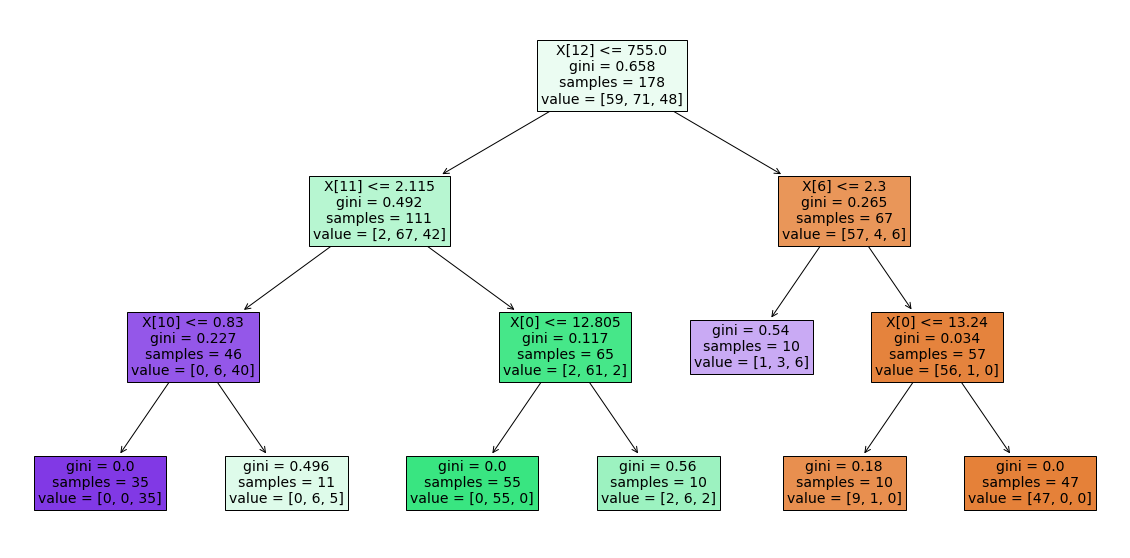

In [55]:
clf = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=10)
clf.fit(X, y)
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, fontsize=14)

[Text(620.0, 475.65000000000003, 'X[12] <= 755.0\ngini = 0.658\nsamples = 178\nvalue = [59, 71, 48]'),
 Text(372.0, 339.75, 'X[11] <= 2.115\ngini = 0.492\nsamples = 111\nvalue = [2, 67, 42]'),
 Text(248.0, 203.85000000000002, 'X[10] <= 0.935\ngini = 0.227\nsamples = 46\nvalue = [0, 6, 40]'),
 Text(124.0, 67.94999999999999, 'gini = 0.049\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(372.0, 67.94999999999999, 'gini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(496.0, 203.85000000000002, 'gini = 0.117\nsamples = 65\nvalue = [2, 61, 2]'),
 Text(868.0, 339.75, 'X[6] <= 2.165\ngini = 0.265\nsamples = 67\nvalue = [57, 4, 6]'),
 Text(744.0, 203.85000000000002, 'gini = 0.375\nsamples = 8\nvalue = [0, 2, 6]'),
 Text(992.0, 203.85000000000002, 'gini = 0.065\nsamples = 59\nvalue = [57, 2, 0]')]

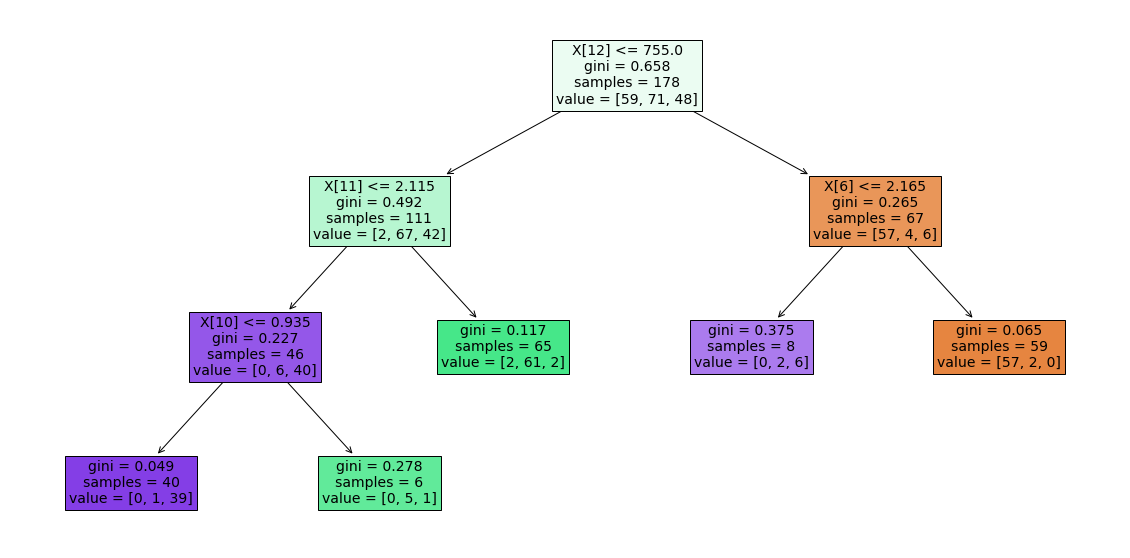

In [56]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes=5)
clf.fit(X, y)
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, fontsize=14)